In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
path = "./data/shapefiles/tl_2022_37_tract.shp"

In [3]:
df = gpd.read_file(path)
df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,37,031,970402,37031970402,9704.02,Census Tract 9704.02,G5020,S,2395384,1553995,+34.7239933,-076.7087383,"POLYGON ((-76.74294 34.72725, -76.74269 34.729..."
1,37,031,970502,37031970502,9705.02,Census Tract 9705.02,G5020,S,6094915,4244211,+34.7517653,-076.7387561,"POLYGON ((-76.77200 34.73658, -76.77195 34.736..."
2,37,031,970805,37031970805,9708.05,Census Tract 9708.05,G5020,S,139248627,421209,+34.7817392,-077.0184797,"POLYGON ((-77.13166 34.79815, -77.13151 34.798..."
3,37,031,970903,37031970903,9709.03,Census Tract 9709.03,G5020,S,5864308,30151466,+34.7011054,-076.9739116,"POLYGON ((-77.03494 34.66483, -77.03405 34.665..."
4,37,031,970101,37031970101,9701.01,Census Tract 9701.01,G5020,S,28018671,35773987,+34.8896386,-076.3524929,"POLYGON ((-76.40475 34.85573, -76.40442 34.857..."


In [4]:
census_df = pd.read_csv("./data/nc/DECENNIALPL2020.P1-Data.csv")

In [5]:
census_df = census_df[census_df["NAME"].str.contains("Census Tract")]
census_df = census_df[["GEO_ID", "NAME", "P1_001N", "P1_003N"]] # P1_001N = Total Population, P1_003N = White alone
census_df["P1_001N"] = census_df["P1_001N"].astype(int)
census_df["P1_003N"] = census_df["P1_003N"].astype(int)
census_df["white_prop"] = census_df["P1_003N"] / census_df["P1_001N"]
census_df.head()

,GEO_ID,NAME,P1_001N,P1_003N,white_prop
102,1400000US37001020100,"Census Tract 201, Alamance County, North Carolina",4040,2383,0.589851
103,1400000US37001020200,"Census Tract 202, Alamance County, North Carolina",4137,1386,0.335025
104,1400000US37001020301,"Census Tract 203.01, Alamance County, North Ca...",4213,1159,0.275101
105,1400000US37001020302,"Census Tract 203.02, Alamance County, North Ca...",3974,1263,0.317816
106,1400000US37001020400,"Census Tract 204, Alamance County, North Carolina",6556,1385,0.211257


In [6]:
census_df["GEOID"] = census_df["GEO_ID"].str[9:] # Remove the first 9 characters of the GEO_ID column to match map data

In [7]:
race_map = df.merge(census_df, left_on="GEOID", right_on="GEOID", validate="one_to_one")

In [8]:
race_map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEO_ID,NAME_y,P1_001N,P1_003N,white_prop
0,37,031,970402,37031970402,9704.02,Census Tract 9704.02,G5020,S,2395384,1553995,+34.7239933,-076.7087383,"POLYGON ((-76.74294 34.72725, -76.74269 34.729...",1400000US37031970402,"Census Tract 9704.02, Carteret County, North C...",1412,982,0.695467
1,37,031,970502,37031970502,9705.02,Census Tract 9705.02,G5020,S,6094915,4244211,+34.7517653,-076.7387561,"POLYGON ((-76.77200 34.73658, -76.77195 34.736...",1400000US37031970502,"Census Tract 9705.02, Carteret County, North C...",2083,1870,0.897744
2,37,031,970805,37031970805,9708.05,Census Tract 9708.05,G5020,S,139248627,421209,+34.7817392,-077.0184797,"POLYGON ((-77.13166 34.79815, -77.13151 34.798...",1400000US37031970805,"Census Tract 9708.05, Carteret County, North C...",1698,1464,0.862191
3,37,031,970903,37031970903,9709.03,Census Tract 9709.03,G5020,S,5864308,30151466,+34.7011054,-076.9739116,"POLYGON ((-77.03494 34.66483, -77.03405 34.665...",1400000US37031970903,"Census Tract 9709.03, Carteret County, North C...",1092,1023,0.936813
4,37,031,970101,37031970101,9701.01,Census Tract 9701.01,G5020,S,28018671,35773987,+34.8896386,-076.3524929,"POLYGON ((-76.40475 34.85573, -76.40442 34.857...",1400000US37031970101,"Census Tract 9701.01, Carteret County, North C...",863,811,0.939745


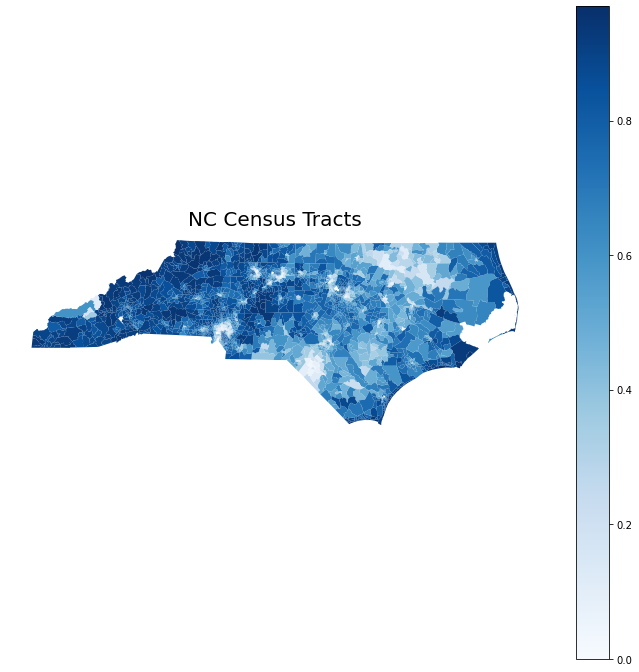

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
race_map.plot(ax=ax, column='white_prop', cmap='Blues', legend=True)
ax.set_title('NC Census Tracts', fontsize=20)
ax.axis('off')
plt.savefig('images/nc.png')